# **ML in Python**

### Bryce Macher, Washington DC

---

# Learning Objectives

**Machine Learning (general)**
- Define the 5 primary questions Machine Learning has the ability to answer
- Identify projects that would benefit from supervised vs. unsupervised Machine Learning

**Supervised ML regression**
- Utilize industry-standard techniques for building reliable machine learning models
- Implement & demonstrate mathematical understanding of a Linear Regression Supervised ML model for predicting continuous values from scratch
- Utilize sklearn to build a linear regression and evaluate its performance via validation
- Examine the framework for machine learning experimentation, including model comparison

# Machine Learning

Where descriptive and summary statistics can be used to describe the past, Machine Learning can be used to both predict highly-likely future scenarios (predictive analytics) AND the impact of specific decisions (prescriptive analytics). 

While this sounds like AI and the future, it is constrained by the types of question a computer's hyper logical framework can answer - it is still not capable of intuition, as we discussed in the statistics unit. 

## 5 Questions of ML
ML can really only answer 5 types of questions. They are: 

1. How many? 
2. This or that? 
3. What is the internal structure?
4. Is this weird? 
5. What should I do next? 

For data scientists, every project that utilizes classic machine learning can be boiled down to these. Remember, though, as you're learning, data scientsits are not only people who use ML to solve problems - we often call on a range of mathematical, statistical, and technical solutions to solve business problems in the most scientific way possible. 

Each of these questions represents a different type of machine learning. There are three primary categories of ML: 

<p><img alt="Colaboratory logo" src="https://miro.medium.com/max/1204/0*-068ud_-o3ajwq_z.jpg" align="Center" hspace="10px" vspace="0px"></p>

Questions 1 & 2 are considered __supervised machine learning__. In supervised machine learning, we have a goal of predicting something that can be known. For example, we can use past stock performance to predict future stock performance. As we'll discuss, we might train a model using stock data from January 2019-June 2020. We will then try to predict what happened June 2020-December 2020, and can compare that prediction (i.e., supervise the performance) with what actually happened during that timespan. 

Question 3, 4, and 5 are __unsupervised ML__ questions. In unsupervised ML, we may not have a clear answer that we can supervise. An example might be "Do customers behave in a way that makes them easy to segment?" or "What are the primary areas of conversation among our customers on social media?" Here, we use a class of ML algorithms that can identify implicit structures in data using statistics, calculus, and linear algebra. 

__Reinforcement ML__ refers to a new class of methodologies that take errors from Questions 1 & 2, and allow the computer to learn the structure of those errors, with the hopes of balancing that structure of error to improve future predictions -- in many ways, RML is Unsupervised ML applied improving Supervised ML. 






## Applied ML Examples

__Supervised Q1__: Can you predict the number of sales based on our advertising spend in TV, News, and Radio? 

__Supervised Q2__: Based on past user behavior, can you tell us which users have the highest probability of churning? 

__Unsupervised Q3__: Based on their eating habits, is there any way to scientifically segment dietary habits in this village? 

__Unsupervised Q4__: Looking at our evolving spending habits, can we identify potential credit card fraud? 

__Unsupervised Q5__: What shows should our in-app viewers watch next to maximize the number of minutes spent on the app? 

---

Today, we will be focused on answering question 1. Once you learn how to answer your first question, you have two options -- you can go for breadth and learn about all 5 questions, or you can dive into the many methodologies for answering just question 1. Regardless, the lessons we learn here are applied to every ML algorithm you might encounter in your career as a data scientist!

# Linear Regression & Vocabulary

__Algorithm__ and __ML Model__ are terms that are typically used interchangably when treated like buzzwords. But for data scientists, they have a very particular meaning. Similarly, we often want to ask questions about not just "data", but the relationship between __training data__ and __validation and testing data__. 

This section focuses on these key terms, and how we use them in data science. 

__Business application__:
Let's assume the business has asked us how well TV ads can predict sales. We're going to build our first ML model from scratch to tell them.

In [30]:
#these are the usual libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [31]:
#read your data into a dataframe using pandas' read_csv method. Note, the index_col should be set to 0 for this dataset
df = pd.read_csv("./data/TV-Radio-Newspaper-Sales.txt",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [32]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Algorithm --> Model

In this lesson, we will look at the linear regression as a solution to supervised ML problems. 

The algorithm for a linear regression is a mathematical formula, or recipe, that tells us how to make a specific prediction. You might know the basic version of this formula quite well from high school algebra. 

```Y = mX+b```

We can read this as 

```For each continuous change in X, y is predictable by multiplying the rate of change (m) by the value of X, and adding this to the initial value (b).```

For ML, we complicate a bit more, since we will rarely see only one independent variable (X) and also need to account for some type of irreducible error. 

<p><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScayGTKCz4Sia1f031p3A8SBL_rRLiHnTJDA&usqp=CAU" align="Center" hspace="10px" vspace="0px"></p>

where

<p><img src="https://miro.medium.com/max/4800/0*gR-W7RFar9ijxwAa" align="Center" hspace="10px" vspace="0px"></p>

This is the __Ordinary least squares (OLS)__ linear regression __algorithm__ that we will cover extensively in this lesson. The goal is to calculate values of  α and β in a way that minimizes the sum of the squared difference between Y-actual and y-predicted.

This model makes 3 assumptions: 
- Dependent variable is not heteroskedastic (shotgun blast) and has linearality
- There is no multi-collinearity or autocorrelation
- Errors are normally distributed and homoskedastic, with equal variance around the regressor

is there a linear relation?


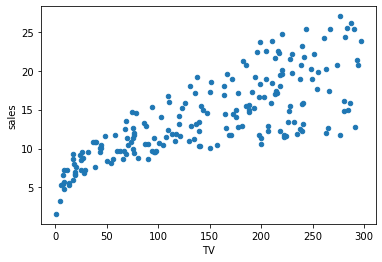

In [33]:
#let's check our assumptions from above, assuming we will predict sales. 
print('is there a linear relation?')
df.plot(x = 'TV', y = 'sales', kind = 'scatter');

- Autocorrelation and multi-collinearity is a measure of the relationship among indepdent variables. 

- Time is said to be autocorrelated - each moment relies on the moment prior to exist, with everything happening now being only possible given that a second ago just happened. Time can never be an indepdent or dependent variable in business ML. 

- Multi-collinearity will be discussed below, when we get to multiple regression. 

- The third condition can only be tested *after* we build our model. 

So, let's get started implementing our model!
 
---




Let's start with the inner most part of the formulae - calculating beta: 

<p><img src="https://miro.medium.com/max/4800/0*gR-W7RFar9ijxwAa" align="Center" hspace="10px" vspace="0px"></p>

In the divisor line, we will multiply two differences - the difference between our X value in position 1 and the mean of matrix X, and the difference between the y value in position 1 and the mean of series y. Sigma indicates that we will add all of these values together. This is called the calculation of covariance. 

In the dividend, we take the difference between X value in position 1 and the mean of X and square it for each X value. We then add those together to calculate beta. This is the calculating of variance.  

In [34]:
# get our means for X and y for use in the formula
X_mean_1 = df.TV.mean()
y_mean_1 = df.sales.mean()

#calculate the terms for covariance and variance
df['cov_TV-sales'] = (df['TV'] - X_mean_1) * (df['sales'] - y_mean_1)
df['var_TV'] = (df['TV'] - X_mean_1)**2 #implement the variance of our equation

# show our dataframe
df.head()

,TV,radio,newspaper,sales,cov_TV-sales,var_TV
1,230.1,37.8,69.2,22.1,670.896956,6898.548306
2,44.5,39.3,45.1,10.4,371.460206,10514.964306
3,17.2,45.9,69.3,9.3,613.181206,16859.074806
4,151.5,41.3,58.5,18.5,19.958456,19.869306
5,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [35]:
#calculate beta and alpha
beta = df['cov_TV-sales'].sum() / df['var_TV'].sum() #based on the above, how do you do implement this. Don't forget that we need the sigma of each
alpha = y_mean_1 - (beta * X_mean_1) #average of y minus ß times the average of X.

#print your alpha and beta
print('beta: {}'.format(beta))
print('alpha: {}'.format(alpha))

beta: 0.047536640433019736
alpha: 7.032593549127698


At this point, we've moved from the __Ordinary Least Squares algorithm__ to a __Linear Model__ that uses that algorithm to mathematically represent our data. This allows us to use the model to generate predictions about what might happen in the future -- at this point, note that we have no way of knowing if it's _good_.

In [36]:
#now, let's generate our prediction for each value. 
df['pred_sales'] = alpha + beta * df.TV

#and look at our dataframe
df.head()

,TV,radio,newspaper,sales,cov_TV-sales,var_TV,pred_sales
1,230.1,37.8,69.2,22.1,670.896956,6898.548306,17.970775
2,44.5,39.3,45.1,10.4,371.460206,10514.964306,9.147974
3,17.2,45.9,69.3,9.3,613.181206,16859.074806,7.850224
4,151.5,41.3,58.5,18.5,19.958456,19.869306,14.234395
5,180.8,10.8,58.4,12.9,-37.892794,1139.568806,15.627218


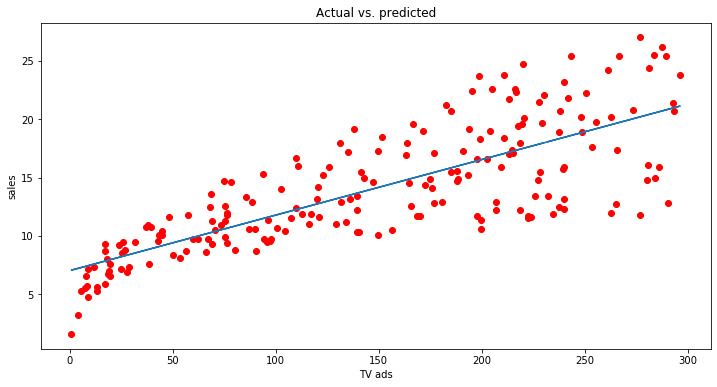

In [37]:
#it's hard to see how we did just based on this, so let's do some plotting of our actual vs. predicted 
plt.figure(figsize = (12, 6)) #this sets the size of our graph
plt.plot(df.TV, df.sales, 'ro') #this is our actuals, represented as rED o'S (hence ro)
plt.plot(df.TV, df.pred_sales) #this is our linear regression
plt.title('Actual vs. predicted')
plt.xlabel('TV ads')
plt.ylabel('sales');

## Evaluating models
Above, we can see that our model is better for lower number of ads, but loses it's abilty to predict as the number of tv ads increases. 

We can quantify this problem using two metricss: error and R2. 



There are three types of error used in regressions: mean absolute error (MAE), mean-squared error (MSE), and root mean-squared error (RMSE). Note: N here represents the number of predictions you made. 

<p><img src="https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG" align="Center" hspace="10px" vspace="0px"></p>

Let's implement the mean absolute error ourselves, and then turn to the sklearn library to calculate MSE

In [38]:
#IN code below, break the Mean Absolute Error equation into different parts
y_hat = df.pred_sales.mean()
y_bar = df.sales.mean()
##A series of aboslute values (use np.abs()) of the difference between y in position 1 and our y-prediction in position 1
df['error_list'] = np.abs(df.sales - df.pred_sales)
##The sum of that series, divided by N number of predictions
MAE = 1/df.shape[0] * df.error_list.sum()
print('Mean Absolute Error is: {}'.format(MAE))
df.head()

Mean Absolute Error is: 2.5498060389274864


,TV,radio,newspaper,sales,cov_TV-sales,var_TV,pred_sales,error_list
1,230.1,37.8,69.2,22.1,670.896956,6898.548306,17.970775,4.129225
2,44.5,39.3,45.1,10.4,371.460206,10514.964306,9.147974,1.252026
3,17.2,45.9,69.3,9.3,613.181206,16859.074806,7.850224,1.449776
4,151.5,41.3,58.5,18.5,19.958456,19.869306,14.234395,4.265605
5,180.8,10.8,58.4,12.9,-37.892794,1139.568806,15.627218,2.727218


In [39]:
#let's check it by implementing a package from sklearn to calculate metrics
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df.sales, df.pred_sales)

2.5498060389274864

In [40]:
#now, let's look at mse, and RMSE

##import MSE from sklearn and use it
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(df.sales, df.pred_sales)

#print the value
print('Mean-Squared Error is {}'.format(MSE))

Mean-Squared Error is 10.512652915656757


Let's talk about the difference!

Absolute vs. Squared!

In [41]:
#to get to root mean squared error, 
rmse = np.sqrt(mean_squared_error(df.sales, df.pred_sales))
print('RMSE is {}'.format(rmse))

##Recently, sklearn has introduced a root_mean_squared_error method like the above. You will likely see both approahces

RMSE is 3.2423221486546887


R2 is also called the __coefficient of determination__, and is a measure of the proportion of variance in y that is predictable from X (whether X is one indepdent variable or multiple). n. It quantifies how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. 

In [42]:
from sklearn.metrics import r2_score
print('the r2 is: {}'.format(r2_score(df.sales, df.pred_sales)))

the r2 is: 0.611875050850071


With these metrics, we can report to the business that, with an error of around 3.24 sales (RMSE), estimating sales using the number of TV ads is able to account for 61% of variance in sales.

In a production environment, we would say that r2 is too low. But we also don't want it to be too high. This is because of a mathematical relationship we call the bias-variance trade-off (a topic of every data science interview ever). 

<p><img src="https://lh3.googleusercontent.com/proxy/I3WRBycWREUVBDcma6cEI4s_KOjoGYJTpkNZnxlV6jCNZsVjPurIvcviWHRgFQzhka5D0U6vNj8pVpX6VHb4cjR_lyPvxVrExtArBlxeUNVbwEtYTD6x7PJeA3km" align="Center" hspace="10px" vspace="0px"></p>

As we account for more variance, our model becomes 'overfitted' for the data it's trained on. Once there is any break from the training pattern, error will skyrocket. Without enough variance, though, we will also see high error as we're unable to account for any patterns. Our goal as a data scientist is to find a situation-specific balance between bias and variance in order to reduce error. 

<p><img src="https://www.researchgate.net/publication/335604816/figure/fig2/AS:799391489220609@1567601191401/Bias-variance-trade-off-in-machine-learning-This-figure-illustrates-the-trade-off.png" align="Center" hspace="10px" vspace="0px"></p>


A rule of thumb typically used is that r2 should be between 75% and 89%, otherwise risks being over- or under- fit. What the best metric, though, depends on the business case. 

---


We've now learned how to test a model, which is the use ('implementation') of an alogrithm to represent our specific data. 

We have a problem though. We know that when our model knows all of **the** data, it performs this way. But how will our model perform predicting Y when it hasn't already seen the relationship between X and y? 

In other words, how will this model perform on data it's never seen before? 

## Train-test-split and validation

To better represent how models will behave in production and use, we typically hide data from our model. This is called leave-one-out validation.

<p><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVwc3rbRmNj_qVSCG-KcAkHrtlfduTM-Wuyw&usqp=CAU" align="Center" hspace="10px" vspace="0px"></p>




`sklearn` comes with a nice package to do this!

While we are only doing a simple OLS regression, we will still start to follow data science best practices by declaring our variables and passing those - rather than calculating directly on our dataframe. 

In [43]:
#Declare X and y
X = df[['TV']] #we use a capital X to denote a matrix, since sklearn requires this to accomodate both simple and multiple regression
y = df.sales

In [44]:
from sklearn.model_selection import train_test_split

#this package uses multiple item assignment, which allows to quickly assign output to single objects 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, test_size = .3 ,random_state = 42) 

print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 8)
(140, 1)
(60, 1)
(140,)
(60,)


Rather than go through the process of building our model from scratch again, let's leverage the sklearn's linear regression class to quickly make a model. 

Sklearn's models all follow the same formulae (with some exceptions), which makes it easy to learn how to implement any sklearn model after you've done a linear regression!

There are 5 stages (and we've already done #5 previously!)


1.   Import
2.   Instantiate
3. Fit
4. Predict
5. Score



In [45]:
#import
from sklearn.linear_model import LinearRegression

#instantiate this class, creating a local version of the algorithm and storing it in the object lr
sOLS_lr = LinearRegression()

#lr inherits all of the methods of the LinearRegression, including an easy way to fit models using the fit method - this makes it a model
sOLS_lr.fit(X_train, y_train)

#Now, we can store predictions. We're going to call it the simple OLS y_pred
sOLS_y_pred = sOLS_lr.predict(X_test).reshape(-1, 1)

#and measure our model's performance by comparing y_pred to y_test
print('This model has an error of {}'.format(np.sqrt(mean_squared_error(y_test, sOLS_y_pred))))
print('This model captures variance around {}'.format(r2_score(y_test, sOLS_y_pred)))

This model has an error of 2.995161304907236
This model captures variance around 0.6714477229302764


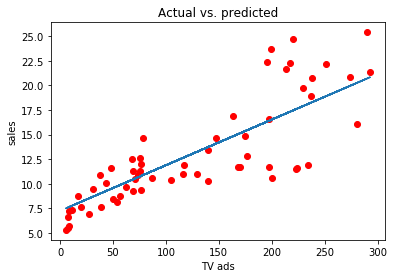

In [46]:
#let's plot our test set to see how our model did. 
plt.plot(X_test, y_test, 'ro') #this is our actuals, represented as rED o'S (hence ro)
plt.plot(X_test, sOLS_y_pred) #this is our linear regression
plt.title('Actual vs. predicted')
plt.xlabel('TV ads')
plt.ylabel('sales');

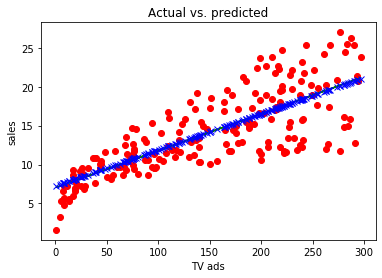

In [47]:
#if we wanted to compare this to our improper model
df['skl-pred_sales'] = sOLS_lr.predict(df[['TV']])

plt.plot(df.TV, df['sales'], 'ro') #this is our actuals, represented as rED o'S (hence ro)
plt.plot(df.TV, df['pred_sales'], 'g-') #this is our linear regression for model 1
plt.plot(df.TV, df['skl-pred_sales'], 'bx') #this is our linear regression for model 1
plt.title('Actual vs. predicted')
plt.xlabel('TV ads')
plt.ylabel('sales');

We can see here that our models perform similarly, as the blue X's that are our sklearn model tightly overlap the green line that is our manually-built linear regression.

## Unstructured Practice

After sharing this with your partners in ad sales, they want you to go back and develop the best model possible. Guide yourself through this practice project, adding more variables to your X value, using train test split, and leveraging sklearn's regressor class. 

When we start using more than one indpendent variable (X), we have to ensure we're not violatin a key assumption of a linear regession -- that our indepdent variables are truly independent. To test that, we can check a correlation heatmap to evaulate what variables are at risk of being collinear.

In [48]:
#using pandas, we can get a correlation matrix. Remember, a correlation is between 1 and -1
## 1 means that it is positively correlated and moves in synchrony positively (i.e., high risk of collinearity)
## -1 means that is negatively correlated and moves in synchrony negatively (i.e., high risk fo collinearity)
df.corr()

,TV,radio,newspaper,sales,cov_TV-sales,var_TV,pred_sales,error_list,skl-pred_sales
TV,1.000000,0.054809,0.056648,0.782224,-0.129791,-0.078797,1.000000,0.480019,1.000000
radio,0.054809,1.000000,0.354104,0.576223,0.333135,0.096884,0.054809,0.108212,0.054809
newspaper,0.056648,0.354104,1.000000,0.228299,0.124422,0.081003,0.056648,0.084437,0.056648
sales,0.782224,0.576223,0.228299,1.000000,0.096153,-0.146003,0.782224,0.359552,0.782224
cov_TV-sales,-0.129791,0.333135,0.124422,0.096153,1.000000,0.744287,-0.129791,-0.044700,-0.129791
var_TV,-0.078797,0.096884,0.081003,-0.146003,0.744287,1.000000,-0.078797,0.067464,-0.078797
pred_sales,1.000000,0.054809,0.056648,0.782224,-0.129791,-0.078797,1.000000,0.480019,1.000000
error_list,0.480019,0.108212,0.084437,0.359552,-0.044700,0.067464,0.480019,1.000000,0.480019
skl-pred_sales,1.000000,0.054809,0.056648,0.782224,-0.129791,-0.078797,1.000000,0.480019,1.000000


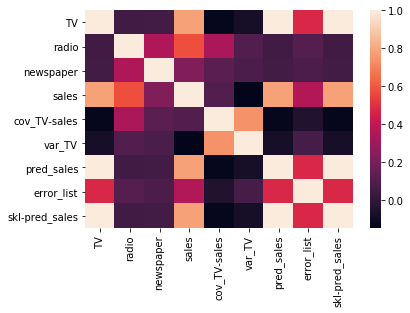

In [49]:
#we can use a package called seaborn to easily identify correlation
import seaborn as sns
sns.heatmap(df.corr())

Above, we are looking for the variable that is most highly correlated with sales. This will be our primary X. We then want any variables that have minimal correlation with our primary X. 

In [50]:
# Declare your X and y variables
X = df[['TV','radio','newspaper']] #we use a capital X to denote a matrix, since sklearn requires this to accomodate both simple and multiple regression
y = df.sales

In [51]:
# Import train-test-split from the sklearn.model_selection library
from sklearn.model_selection import train_test_split

# Use it to create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, test_size = .3 ,random_state = 42) 

In [52]:
#Check the shapes of your input X and y objects

print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 9)
(140, 3)
(60, 3)
(140,)
(60,)


In [53]:
#Import
from sklearn.linear_model import LinearRegression

#instantiate
mOLS_lr = LinearRegression()

#fit
mOLS_lr.fit(X_train, y_train)

#predict
mOLS_y_pred = mOLS_lr.predict(X_test).reshape(-1, 1)
mOLS_y_pred
#score
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, mOLS_y_pred))))
print('R2: {}'.format(np.sqrt(r2_score(y_test, mOLS_y_pred))))

RMSE: 1.9485372043446385
R2: 0.927872109087797


In [54]:
#Let's look at the coefficients and see how each variable impacts the prediction
list(zip(X.columns, mOLS_lr.coef_))

[('TV', 0.0440592809574652),
 ('radio', 0.1992874968989395),
 ('newspaper', 0.0068824522222754635)]

To read the above, we would say that `"holding all things constant, a 1 unit increase in radio causes a .19 increase in sales."` 

Based on that, while it may appear that radio is the most important, this requires a different type of statistical test. You can read more about it here: `https://towardsdatascience.com/key-driver-analysis-in-python-788beb9b8a7d`

In [55]:
#Create a visualization that shows how your model with multiple variables compares to your 


# Comparing Models

After we build multiple models, we may want to test if there's any real discernable difference statistically. One way to compare how well different models perform is by measuring the error and R2. But this only tells us so much about a model, especially if the training data distribution is not normal.

Another approach is the non-Parametric version of a t-Test: The Wilcoxon signed-rank test. Using k-fold cross-validation we can create, for each model, k accuracy scores. This will result in two samples, one for each model. Then, we can use the Wilcoxon signed-rank test to test if the two samples differ significantly from each other. If they do, then one is more accurate than the other.

Cross validation builds off of train-test split in order to more accurately learn the right beta-coefficients for our linear regression. 

<p><img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" align="Center" hspace="10px" vspace="0px"></p>

A Wilcoxon signed-rank test will then return a p-value that helps us decide if our models are significantly different, allowing us to pick a model both on its hard performance on data and comparison between the two. 

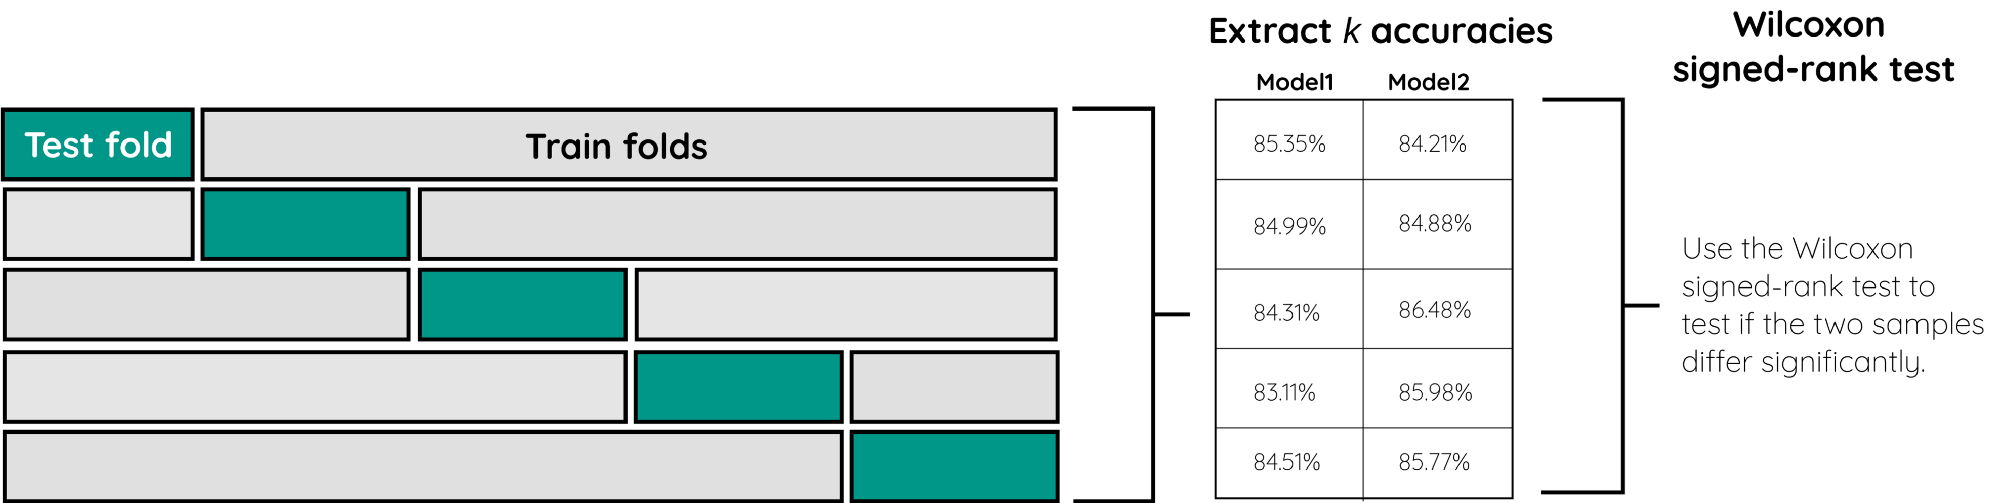

The output is a p-value. If the value is lower than .05, we can reject the null hypothesis that there are no significant differences between the model. 



In [56]:
#Set up our X and y for each respective model
X_1 = df[['TV']] #X from sOLS_lr
X_2 = df[['TV', 'newspaper', 'radio']] #replace with whichever features you used in your mOLS_lr above!
y = df.sales

# Import train-test-split from the sklearn.model_selection library
from sklearn.model_selection import train_test_split

# Use it to create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_1, y, train_size = .7, test_size = .3 ,random_state = 42) 


In [62]:
from sklearn.model_selection import KFold, cross_val_score

#Set up the splits for the cross val score
kf = KFold(n_splits = 10, shuffle = True, random_state = 25) #important to keep the same split, hence the random_state!

#extract the results from each model on the same split
results_test_1 = cross_val_score(sOLS_lr, X_1, y, cv = kf, scoring = 'neg_mean_squared_error')
results_test_2 = cross_val_score(mOLS_lr, X_2, y, cv = kf, scoring = 'neg_mean_squared_error')

In [59]:
import numpy as np


In [60]:
#examine the average error from both models
print(results_test_1)
print('average RMSE: {}'.format(np.sqrt(np.abs(results_test_1.mean()))))
print('\n')
print(results_test_2)
print('average RMSE: {}'.format(np.sqrt(np.abs(results_test_2.mean()))))

[-14.93244051 -11.36944906  -8.33915996  -9.23586262 -11.43553742
  -8.10852687 -13.69651156  -6.99174008 -12.27120157 -12.15222941]
average RMSE: 3.294429526471048


[-4.31044218 -2.24728807 -1.99180844 -2.33684754 -2.37067841 -1.61834921
 -2.18803352 -8.40038661 -2.63166034 -2.68760799]
average RMSE: 1.7545113937389885


We will now use the wilcoxon rank to test the null hypothesis. The _Wilcoxon signed-rank test_ is a non-parametric statistical hypothesis test used to compare two related samples, matched samples, or repeated measurements (as in this case) on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It is non-parametric becuase we assume that the population does not have a normal distribution. 



In this situation.


- $H_a$: There is a difference in how these models calculate sales (indicates need for 2-sided) - the median difference != 0
- $H_0$: There is no discernable difference in these models - the median difference = 0. 

In [61]:
# Comparing Models
from scipy.stats import wilcoxon #documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
stat, p = wilcoxon(results_test_1, results_test_2, zero_method = 'zsplit')
print('p-value is: {}'.format(p))

p-value is: 0.0069104298078147995


We would reject the null hypothesis at a confidence level of < 1%, concluding that there is a difference in how well these models predict sales. 

Comparing the RMSE and R2 between the models, we would select the model with the lowest RMSE and an R2 accepted within a set standard (between .75 and .89 in this case). 

Given that model two has a lower RMSE, but does not meet our variance standard, we would need to decide the level of risk and weigh whether or not to accept this model into production. 

In conclusion, we can go back to ad sales and say "We have built a model that is able to predict sales with an error of around 2.4 units per prediction unit. Our calculations suggest that it is only able to account for ~60% of the change in sales when TV, radio, and newspaper ad count changes." 

# Your turn - a single exercise!

The business has asked you to to analyze some housing data, in order to guide future renovations. "We'd like a tool that allows us to input the features of a house and its environment, and get it's value in return." 

I capture the data for you below. Be sure to go through the process: 

1. Test the assumptions of an OLS
2. Identify the best features, with at least 2 models
3. Measure the performance of those models, and visualize
4. Compare your models and choose the best one
5. Answer the final question

In [64]:
#Data is here. For dictionary of the columns, see: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
from sklearn.datasets import load_boston
data = load_boston()
housing = pd.DataFrame(data.data, columns = data.feature_names)
housing['MEDV'] = data.target #Median value of owner-occupied homes in $1000's
housing.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [86]:
housing.shape

(506, 14)

In [106]:
#some cells to get you started with EDA. Add more below
# get correlation matrix
housing.corr()
# looking at the correlation matrix, LSTAT has the highest correlation with MEDV (-0.74)
# so, we should be able to create sOLS_lr using LSTAT
# also, for multiple OLS, we should consider LSTAT (-0.74), RM(0.69),PTRATIO(-0.51),INDUS(-0.48), and TAX(-0.47)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


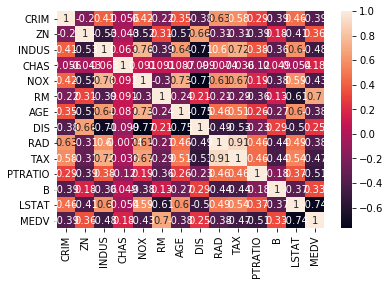

In [105]:
#we can use a package called seaborn to easily identify correlation
import seaborn as sns
sns.heatmap(housing.corr(),annot=True)

In [116]:
#create a linear regression called lr. 
#Set up our X and y for each respective model
# simple OLS
X1 = housing[['LSTAT']] 
y = housing.MEDV
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, train_size = .8, test_size = .2 ,random_state = 42) 
# import
from sklearn.linear_model import LinearRegression
# instantiate
sOLS_lr = LinearRegression()
# fit
sOLS_lr.fit(X1_train,y1_train)
sOLS_pred = sOLS_lr.predict(X1_test).reshape(-1,1)
# evaluate
from sklearn.metrics import r2_score,mean_squared_error
print('RMSE value for the simple linear regression model is {}'.format(np.sqrt(mean_squared_error(sOLS_pred,y1_test))))
print('R2 value for the simple linear regression model using LSTAT is {}'.format(r2_score(sOLS_pred,y1_test)))

RMSE value for the simple linear regression model is 5.789606996393182
R2 value for the simple linear regression model using LSTAT is 0.30957491370349577


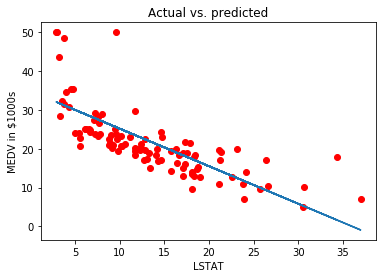

In [93]:
plt.plot(X1_test, y1_test, 'ro') #this is our actuals, represented as rED o'S (hence ro)
plt.plot(X1_test, sOLS_pred) #this is our linear regression
plt.title('Actual vs. predicted')
plt.xlabel('LSTAT')
plt.ylabel('MEDV in $1000s');

In [119]:
# multiple regression analysis using LSTAT and CHAS
# multiple OLS
#X2 = housing[['LSTAT','INDUS','RM','PTRATIO','INDUS','TAX']] 
X2 = housing[['LSTAT','RM']] 
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, train_size = .8, test_size = .2 ,random_state = 42) 
# import
from sklearn.linear_model import LinearRegression
# instantiate
mOLS_lr = LinearRegression()
# fit
mOLS_lr.fit(X2_train,y2_train)
mOLS_pred = mOLS_lr.predict(X2_test).reshape(-1,1)
# evaluate
from sklearn.metrics import r2_score,mean_squared_error
print('RMSE value for the multiple linear regression model is {}'.format(np.sqrt(mean_squared_error(mOLS_pred,y2_test))))
print('R2 value for the multiple linear regression model is {}'.format(r2_score(mOLS_pred,y2_test)))
# coefficients
print(list(zip(X2.columns,mOLS_lr.coef_)))

RMSE value for the multiple linear regression model is 5.589569804715174
R2 value for the multiple linear regression model is 0.42141820694180177
[('LSTAT', -0.6324985627075874), ('RM', 5.465098773075864)]


In [120]:
# cross validation comparing sOLS and mOLS
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10,shuffle=True,random_state=42)
result1 = cross_val_score(sOLS_lr,X1,y,cv=kf,scoring='neg_mean_squared_error')
result2 = cross_val_score(mOLS_lr,X2,y,cv=kf,scoring='neg_mean_squared_error')
from scipy.stats import wilcoxon
stat,p = wilcoxon(result1,result2,zero_method = 'zsplit')
print(stat)
print(p)
print(result1)

3.0
0.012515318690073973
[-27.53418829 -39.3165885  -45.18959535 -39.5644993  -39.59637565
 -35.67749876 -44.21685186 -40.44369163 -34.16991217 -42.10125745]


__Final Question__:

We have a house with the following stats: 

- Crim: .02731
- Indus: 12
- Chas: 1
- Rooms: 4
- Age: 34
- PT ratio: 12
- DIS: 3

What is the expected median value of the house?

In [ ]:
#pseudo-code
lr.predict([[<values above, and any you have to impute/fill>]])

# Review
In this lesson we
- Covered the questions answerd by ML
- Highlighted the difference between supervised, unsupervised, and re-enforcement learning
- Learned the appropriate framework for training ML models, and testing their performance on out-of-sample data
- Implemented a simple OLS linear regression by hand, and discussed the importance of math
- Introduced multiple OLS with sklearn, discussing how to best leverage packages
- Visualized the relation between actual numbers and predicted numbers
- Calculated the error and variance of models to understand how 'good' they are
- Compared two models to ensure that they were in fact different. 